In [21]:
from hkvpy.fews import pi, dataportal
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [22]:
wsdl = 'http://dashboardservices.hkv.nl:8080/FewsPiService/fewspiservice?wsdl'
pi.setClient(wsdl)

In [23]:
filters = pi.getFilters()

In [24]:
vars(filters)

{'PI_SERVICE': {'description': '', 'id': 'PI_SERVICE', 'name': 'PI_SERVICE'},
 'PI_SERVICE_SOBEK': {'description': '',
  'id': 'PI_SERVICE.SOBEK',
  'name': 'PI_SERVICE.SOBEK'},
 'PI_SERVICE_SOBEK_ALERT': {'description': '',
  'id': 'PI_SERVICE.SOBEK.ALERT',
  'name': 'PI_SERVICE.SOBEK.ALERT'}}

In [25]:
filter_in = pi.Filters.PI_SERVICE_SOBEK_ALERT['id']

In [27]:
parameters = pi.getParameters(filterId=filter_in)

In [28]:
vars(parameters)

{'WATERLEVEL_SIM_ALERT': {'displayUnit': 'm',
  'id': 'WATERLEVEL.SIM.ALERT',
  'name': 'Water level Alerts (simulated)',
  'parameterType': 'instantaneous',
  'unit': 'm',
  'usesDatum': 'true'}}

In [29]:
parameter_in = pi.Parameters.WATERLEVEL_SIM_ALERT['id']

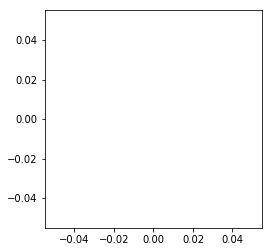

In [30]:
gdf = pi.getLocations(filterId=filter_in, setFormat='gdf')
gdf.plot()

In [34]:
pi.Locations.NNaboupi

{'lat': '1093945.0',
 'locationId': 'NNaboupi',
 'lon': 'NaN',
 'shortName': 'NNaboupi',
 'x': 'NaN',
 'y': '1093945.0'}

In [33]:
gdf.locationId.tolist()

['Akosombo',
 'Benja',
 'Borgou',
 'Koumongou',
 'Mandouri_new',
 'Mandouri_old',
 'Mango_new',
 'Mango_old',
 'Mo',
 'NNaboupi',
 'Pembik',
 'Porga',
 'Sabari',
 'Saboba',
 'Tankpa',
 'Tributary1',
 'Tributary2']

In [35]:
locations = pi.Locations.asGeoDataFrame['locationId'].tolist()

In [36]:
df, entry = pi.getTimeSeries(filterId=filter_in,
                             parameterIds=parameter_in,
                             locationIds=pi.Locations.asGeoDataFrame['locationId'].tolist(),
                             startTime=datetime(2017,1,1,2, tzinfo=pi.utils.utc_offset(2*60*60)),
                             endTime=datetime(2017,6,29,2, tzinfo=pi.utils.utc_offset(2*60*60)),
                             setFormat='df'
                            )

In [37]:
df.head()

flag  \
date                      moduleId          parameterId          units locationId   stationName          
2017-01-01 01:00:00+01:00 SobekCF_ALERT_GPM WATERLEVEL.SIM.ALERT m     Akosombo     Akosombo       8.0   
                                                                       Benja        Benja          8.0   
                                                                       Borgou       Borgou         8.0   
                                                                       Koumongou    Koumongou      8.0   
                                                                       Mandouri_new Mandouri_new   8.0   

                                                                                                  value  
date                      moduleId          parameterId          units locationId   stationName          
2017-01-01 01:00:00+01:00 SobekCF_ALERT_GPM WATERLEVEL.SIM.ALERT m     Akosombo     Akosombo     -999.0  
                                                                       Benja        Benja        -999.0  
                                                                       Borgou       Borgou       -999.0  
                                                                       Koumongou    Koumongou    -999.0  
                                                                       Mandouri_new Mandouri_new -999.0

In [67]:
df['value'].replace(-999.0,np.NaN, inplace = True)
level_values = df.index.get_level_values
result = (df.groupby([level_values(i) for i in [1,2,3,4,5]]
                      +[pd.Grouper(freq='W', level=0)]).sum())

In [68]:
#weeksums!!
result

flag  \
moduleId                    parameterId         units locationId     stationName                      date                              
pr.Reizen.mars.baggeracties k.m3.gebaggerd.mars m3    bv.1.7.1.1     Den Helder - Texel, Vaarweg      2017-01-01 00:00:00+01:00   8.0   
                                                                                                      2017-01-08 00:00:00+01:00  56.0   
                                                                                                      2017-01-15 00:00:00+01:00  56.0   
                                                                                                      2017-01-22 00:00:00+01:00  56.0   
                                                                                                      2017-01-29 00:00:00+01:00  56.0   
                                                                                                      2017-02-05 00:00:00+01:00  56.0   
                                                                                                      2017-02-12 00:00:00+01:00  56.0   
                                                                                                      2017-02-19 00:00:00+01:00  56.0   
                                                                                                      2017-02-26 00:00:00+01:00  56.0   
                                                                                                      2017-03-05 00:00:00+01:00  56.0   
                                                                                                      2017-03-12 00:00:00+01:00  56.0   
                                                                                                      2017-03-19 00:00:00+01:00  56.0   
                                                                                                      2017-03-26 00:00:00+01:00  56.0   
                                                                                                      2017-04-02 00:00:00+02:00  56.0   
                                                                                                      2017-04-09 00:00:00+02:00  56.0   
                                                                                                      2017-04-16 00:00:00+02:00  56.0   
                                                                                                      2017-04-23 00:00:00+02:00  56.0   
                                                                                                      2017-04-30 00:00:00+02:00  56.0   
                                                                                                      2017-05-07 00:00:00+02:00  56.0   
                                                                                                      2017-05-14 00:00:00+02:00  56.0   
                                                                                                      2017-05-21 00:00:00+02:00  56.0   
                                                                                                      2017-05-28 00:00:00+02:00  56.0   
                                                                                                      2017-06-04 00:00:00+02:00  56.0   
                                                                                                      2017-06-11 00:00:00+02:00  56.0   
                                                                                                      2017-06-18 00:00:00+02:00  56.0   
                                                                                                      2017-06-25 00:00:00+02:00  56.0   
                                                                                                      2017-07-02 00:00:00+02:00  40.0   
                                                      bv.1.7.1.1.1.1 Den Helder veerhaven, Vak A      2017-01-01 00:00:00+01:00   8.0   
                   

In [69]:
json = result.reset_index().to_json(orient='records', date_format='iso')

In [70]:
dataservice = 'http://85.17.82.66/dataservices/'
dataportal.setDataservice(dataservice)

http://85.17.82.66/dataservices/ will be used as portal


In [71]:
database = 'OMSWaddenzee'
dataportal.createDatabase(database)

{'exception': 'database name already exists'}

In [72]:
key = 'k.m3.gebaggerd.mars|m3'
dataportal.setEntryDatabase(database, 'k.m3.gebaggerd.mars|m3', json)

{'date': '2017-06-28 22:44:43',
 'id': 'e9c227cd-d380-4b44-b176-1cfc8b54293c',
 'key': 'k.m3.gebaggerd.mars|m3'}

In [73]:
out = dataportal.getEntryDatabase(database, key)

http://85.17.82.66/dataservices/data.asmx/read?database=OMSWaddenzee&key=k.m3.gebaggerd.mars|m3
